In [4]:
import numpy as np
import struct
import os

def read_idx(filename):
    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)

images = read_idx('train-images.idx3-ubyte')
labels = read_idx('train-labels.idx1-ubyte')
X = images.reshape((60000, 784))
X = X.astype('float32') / 255.0
y = labels

print(X.shape)
print(y.shape)

(60000, 784)
(60000,)


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42,)

print(f"Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")

Train: (42000, 784), Val: (9000, 784), Test: (9000, 784)


In [6]:
from sklearn.linear_model import LogisticRegression
softmax_model_NONE = LogisticRegression(multi_class='multinomial', solver= 'saga', max_iter=2000, random_state=42,n_jobs=-1,tol=0.1,penalty=None)
softmax_model_NONE.fit(X_train, y_train)
print(f"Validation Accuracy NONE: {softmax_model_NONE.score(X_val, y_val) * 100:.2f}%")


Validation Accuracy NONE: 92.52%


In [7]:
from sklearn.linear_model import LogisticRegression
softmax_model_L2 = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=2000, random_state=42,n_jobs=-1,tol=0.1,penalty='l2',C=1/10)
softmax_model_L2.fit(X_train, y_train)
print(f"Validation Accuracy L2: {softmax_model_L2.score(X_val, y_val) * 100:.2f}%")


Validation Accuracy L2: 92.36%


In [8]:
from sklearn.linear_model import LogisticRegression
softmax_model_L1 = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=2000, random_state=42,n_jobs=-1,tol=0.1,penalty='l1',C=1/10)
softmax_model_L1.fit(X_train, y_train)
print(f"Validation Accuracy L1: {softmax_model_L1.score(X_val, y_val) * 100:.2f}%")


Validation Accuracy L1: 91.80%


In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
nn_model_NONE = Sequential([
    Input(shape=(784,)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

nn_model_NONE.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

history = nn_model_NONE.fit(X_train, y_train, 
                    epochs=30, 
                    validation_data=(X_val, y_val),
                    verbose=1,
)
print(f"Validation Accuracy NONE: {nn_model_NONE.evaluate(X_val, y_val, verbose=0)[1] * 100:.2f}%")


Epoch 1/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9249 - loss: 0.2492 - val_accuracy: 0.9613 - val_loss: 0.1332
Epoch 2/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9675 - loss: 0.1050 - val_accuracy: 0.9661 - val_loss: 0.1117
Epoch 3/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9785 - loss: 0.0697 - val_accuracy: 0.9720 - val_loss: 0.0926
Epoch 4/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9824 - loss: 0.0544 - val_accuracy: 0.9736 - val_loss: 0.0978
Epoch 5/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9857 - loss: 0.0438 - val_accuracy: 0.9718 - val_loss: 0.1027
Epoch 6/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9893 - loss: 0.0329 - val_accuracy: 0.9743 - val_loss: 0.0973
Epoch 7/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9899 - loss: 0.0314 - val_accuracy: 0.9712 - val_loss: 0.1163
Epoch 8/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9907 - loss: 0.0283 - 

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import regularizers 
nn_model_L2 = Sequential([
    Input(shape=(784,)),
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(1/1000)),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1/1000)),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(1/1000)),
    Dense(10, activation='softmax')
])

nn_model_L2.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

history = nn_model_L2.fit(X_train, y_train, 
                    epochs=30, 
                    validation_data=(X_val, y_val),
                    verbose=1,
)
print(f"Validation Accuracy L2: {nn_model_L2.evaluate(X_val, y_val, verbose=0)[1] * 100:.2f}%")


Epoch 1/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9195 - loss: 0.5697 - val_accuracy: 0.9458 - val_loss: 0.3983
Epoch 2/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9568 - loss: 0.3328 - val_accuracy: 0.9614 - val_loss: 0.2946
Epoch 3/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9633 - loss: 0.2763 - val_accuracy: 0.9651 - val_loss: 0.2587
Epoch 4/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9673 - loss: 0.2451 - val_accuracy: 0.9624 - val_loss: 0.2506
Epoch 5/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9690 - loss: 0.2264 - val_accuracy: 0.9694 - val_loss: 0.2269
Epoch 6/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9710 - loss: 0.2129 - val_accuracy: 0.9693 - val_loss: 0.2180
Epoch 7/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9714 - loss: 0.2046 - val_accuracy: 0.9689 - val_loss: 0.2124
Epoch 8/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9736 - loss: 0.1941 - 

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import regularizers 

nn_model_L1 = Sequential([
    Input(shape=(784,)),
    Dense(256, activation='relu', kernel_regularizer=regularizers.l1(1/10000)),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l1(1/10000)),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l1(1/10000)),
    Dense(10, activation='softmax')
])

nn_model_L1.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

history = nn_model_L1.fit(X_train, y_train, 
                    epochs=30, 
                    validation_data=(X_val, y_val),
                    verbose=1,
)
print(f"Validation Accuracy L1: {nn_model_L1.evaluate(X_val, y_val, verbose=0)[1] * 100:.2f}%")



Epoch 1/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9178 - loss: 0.7497 - val_accuracy: 0.9504 - val_loss: 0.5239
Epoch 2/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9582 - loss: 0.4479 - val_accuracy: 0.9603 - val_loss: 0.3981
Epoch 3/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9661 - loss: 0.3495 - val_accuracy: 0.9397 - val_loss: 0.4143
Epoch 4/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9710 - loss: 0.2928 - val_accuracy: 0.9704 - val_loss: 0.2888
Epoch 5/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9744 - loss: 0.2591 - val_accuracy: 0.9621 - val_loss: 0.2773
Epoch 6/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9752 - loss: 0.2385 - val_accuracy: 0.9736 - val_loss: 0.2352
Epoch 7/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9776 - loss: 0.2207 - val_accuracy: 0.9713 - val_loss: 0.2452
Epoch 8/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9793 - loss: 0.2091 - 

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

def show_report(model, X_test, y_test, title, is_tensorflow=False):
    print(f"================{title}=====================")
    
    if is_tensorflow:
        probs = model.predict(X_test, verbose=0)
        y_pred = np.argmax(probs, axis=1)
    else:
        y_pred = model.predict(X_test)
        
    print(classification_report(y_test, y_pred, digits=4))
    
    plt.figure(figsize=(6, 5))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

================Softmax (No Regularization)=====================
              precision    recall  f1-score   support

           0     0.9633    0.9654    0.9643       896
           1     0.9588    0.9764    0.9675       976
           2     0.9097    0.8980    0.9038       853
           3     0.9077    0.8884    0.8980       941
           4     0.9101    0.9540    0.9315       870
           5     0.8954    0.8859    0.8906       841
           6     0.9568    0.9546    0.9557       904
           7     0.9334    0.9249    0.9291       985
           8     0.9034    0.8939    0.8987       858
           9     0.9016    0.8995    0.9006       876

    accuracy                         0.9249      9000
   macro avg     0.9240    0.9241    0.9240      9000
weighted avg     0.9248    0.9249    0.9248      9000



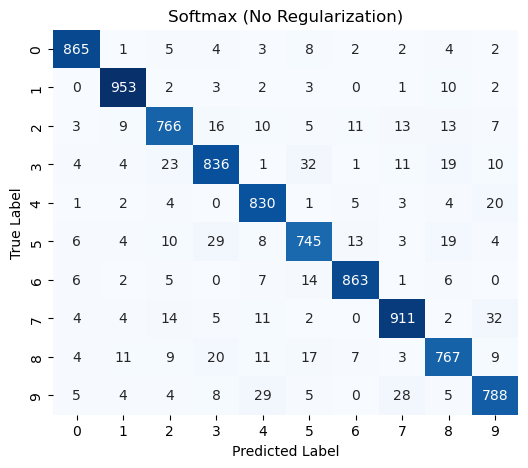

================Softmax (L2 Regularization)=====================
              precision    recall  f1-score   support

           0     0.9621    0.9643    0.9632       896
           1     0.9530    0.9764    0.9646       976
           2     0.9075    0.8968    0.9021       853
           3     0.9031    0.8916    0.8973       941
           4     0.9053    0.9563    0.9301       870
           5     0.8968    0.8882    0.8925       841
           6     0.9569    0.9580    0.9574       904
           7     0.9322    0.9218    0.9270       985
           8     0.9113    0.8858    0.8983       858
           9     0.9052    0.8938    0.8995       876

    accuracy                         0.9241      9000
   macro avg     0.9233    0.9233    0.9232      9000
weighted avg     0.9240    0.9241    0.9239      9000



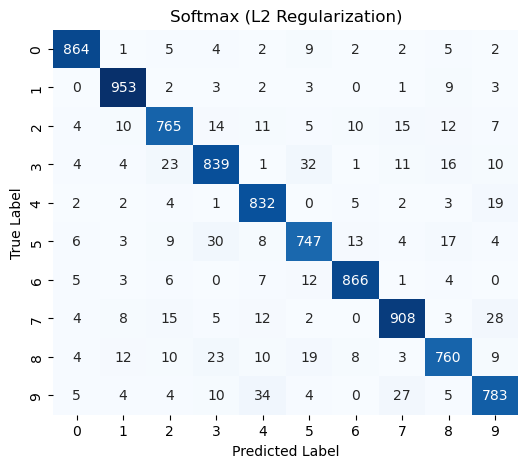

================Softmax (L1 Regularization)=====================
              precision    recall  f1-score   support

           0     0.9651    0.9576    0.9613       896
           1     0.9385    0.9693    0.9536       976
           2     0.9056    0.8886    0.8970       853
           3     0.8999    0.8789    0.8892       941
           4     0.9043    0.9563    0.9296       870
           5     0.8900    0.8847    0.8873       841
           6     0.9503    0.9524    0.9514       904
           7     0.9196    0.9178    0.9187       985
           8     0.8878    0.8765    0.8821       858
           9     0.9018    0.8801    0.8908       876

    accuracy                         0.9170      9000
   macro avg     0.9163    0.9162    0.9161      9000
weighted avg     0.9169    0.9170    0.9168      9000



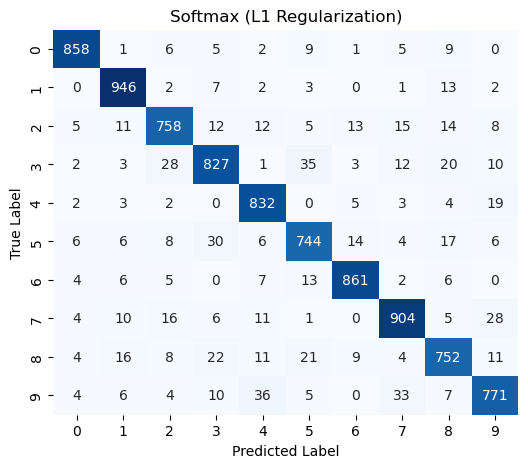

================Neural Network (No Regularization)=====================
              precision    recall  f1-score   support

           0     0.9865    0.9821    0.9843       896
           1     0.9868    0.9939    0.9903       976
           2     0.9822    0.9719    0.9770       853
           3     0.9671    0.9681    0.9676       941
           4     0.9760    0.9828    0.9794       870
           5     0.9794    0.9608    0.9700       841
           6     0.9719    0.9945    0.9831       904
           7     0.9874    0.9553    0.9711       985
           8     0.9608    0.9720    0.9664       858
           9     0.9596    0.9772    0.9683       876

    accuracy                         0.9759      9000
   macro avg     0.9758    0.9758    0.9758      9000
weighted avg     0.9760    0.9759    0.9759      9000



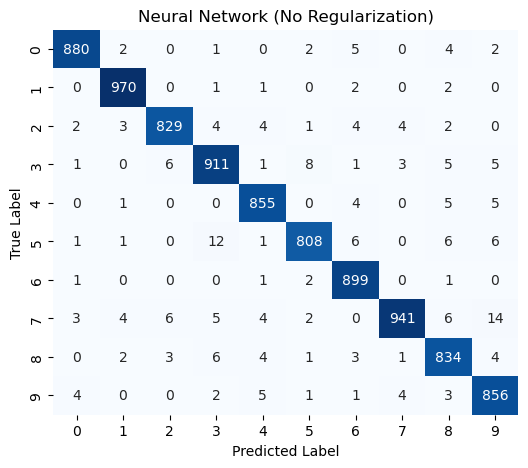

================Neural Network (L2 Regularization)=====================
              precision    recall  f1-score   support

           0     0.9820    0.9766    0.9793       896
           1     0.9878    0.9918    0.9898       976
           2     0.9763    0.9672    0.9717       853
           3     0.9855    0.9405    0.9625       941
           4     0.9827    0.9770    0.9798       870
           5     0.9601    0.9727    0.9663       841
           6     0.9835    0.9878    0.9857       904
           7     0.9483    0.9868    0.9672       985
           8     0.9625    0.9580    0.9603       858
           9     0.9512    0.9578    0.9545       876

    accuracy                         0.9719      9000
   macro avg     0.9720    0.9716    0.9717      9000
weighted avg     0.9721    0.9719    0.9719      9000



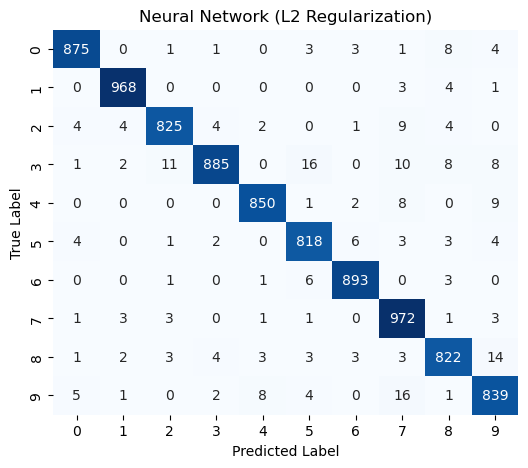

================Neural Network (L1 Regularization)=====================
              precision    recall  f1-score   support

           0     0.9842    0.9732    0.9787       896
           1     0.9818    0.9939    0.9878       976
           2     0.9574    0.9754    0.9663       853
           3     0.9841    0.9235    0.9529       941
           4     0.9859    0.9667    0.9762       870
           5     0.9463    0.9643    0.9552       841
           6     0.9769    0.9823    0.9796       904
           7     0.9846    0.9706    0.9775       985
           8     0.9334    0.9802    0.9562       858
           9     0.9581    0.9658    0.9619       876

    accuracy                         0.9696      9000
   macro avg     0.9693    0.9696    0.9692      9000
weighted avg     0.9699    0.9696    0.9696      9000



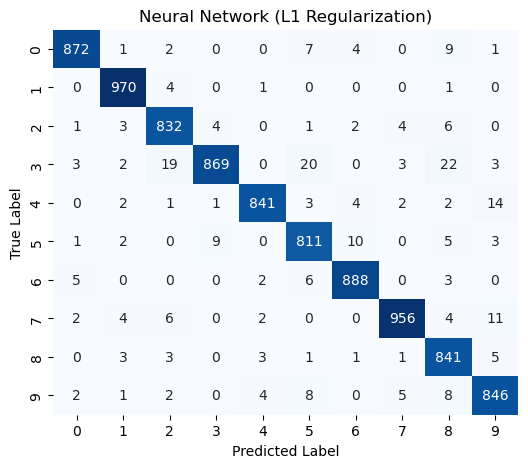

In [13]:
# Softmax NONE
show_report(softmax_model_NONE, X_test, y_test, "Softmax (No Regularization)")
# Softmax L2
show_report(softmax_model_L2, X_test, y_test, "Softmax (L2 Regularization)")
# Softmax L1
show_report(softmax_model_L1, X_test, y_test, "Softmax (L1 Regularization)")
# Neural Network NONE
show_report(nn_model_NONE, X_test, y_test, "Neural Network (No Regularization)", is_tensorflow=True)
# Neural Network L2
show_report(nn_model_L2, X_test, y_test, "Neural Network (L2 Regularization)", is_tensorflow=True)
# Neural Network L1
show_report(nn_model_L1, X_test, y_test, "Neural Network (L1 Regularization)", is_tensorflow=True)


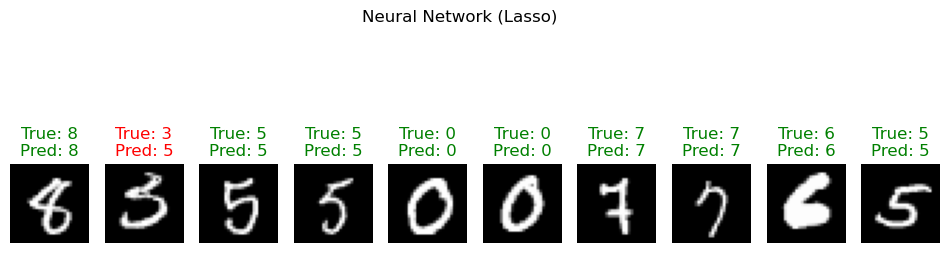

In [25]:
import random

def plot_sample_predictions(model, X_test, y_test, model_name, is_tensorflow=False):
    plt.figure(figsize=(12, 4))
    plt.suptitle(model_name)
    
    for i in range(10):
        idx = random.randint(0, len(X_test) - 1)
        img = X_test[idx].reshape(28, 28)
        true_label = y_test[idx]
        
        if is_tensorflow:
            pred_prob = model.predict(X_test[idx:idx+1], verbose=0)
            pred_label = np.argmax(pred_prob)
        else:
            pred_label = model.predict(X_test[idx:idx+1])[0]
            
        plt.subplot(1, 10, i+1)
        plt.imshow(img,cmap='gray')
        color = 'green' if pred_label == true_label else 'red'
        plt.title(f"True: {true_label}\nPred: {pred_label}", color=color)
        plt.axis('off')
    
    plt.show()

plot_sample_predictions(nn_model_L2, X_test, y_test, "Neural Network (Lasso)", is_tensorflow=True)